<a href="https://colab.research.google.com/github/Kkuntal990/CTW_2020/blob/master/Copy_of_CTW2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#%tensorflow_version 1.x
import numpy as np # linear algebra
import tensorflow as tf
import numpy as np
import os
import h5py
import pandas as pd
import time
import matplotlib.pyplot as plt


In [0]:
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, LeakyReLU, Input, Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Flatten


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/CTW_2019/CTW2019_Dataset_h5.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/CTW_2019/")
zip_ref.close()

In [0]:
def find(SNR):
    #H_R.shape = (512,56,924,5)
    
    #print(temp.shape)
    idx  = np.argmax(SNR, axis=1)
    return idx
    
def preprocess(H_Re, idx):
    #temp = np.zeros(H_Re.shape[:-1])
    for i in range(H_Re.shape[0]):
        for j in range(H_Re.shape[1]):
            
            H_Re[i,j,:,0] = H_Re[i,j,:,idx[i,j]]
    return H_Re[:,:,:,0]

def preprocess2(H_Re, idx):
    temp = np.zeros(H_Re.shape[:-1])
    for i in range(H_Re.shape[0]):
        for j in range(H_Re.shape[1]):
            temp[i,j] = H_Re[i,j,idx[i,j]]
    return temp

def get_data(data_file):
    f = h5py.File(data_file, 'r')
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR = f['SNR'][:] #shape (sample size, 56, 5)
    Pos = f['Pos'][:] #shape(sample size, 3)
    f.close()
    return H_Re, H_Im, SNR, Pos

def get_data2(data_file):
    f = h5py.File(data_file, 'r')
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR = f['SNR'][:] #shape (sample size, 56, 5)
    #Pos = f['Pos'][:] #shape(sample size, 3)
    f.close()
    return H_Re, H_Im, SNR
'''
def mag(data):x

    dim = H.shape[1]
    H_re = H[:, :dim/2]
    H_Im = H[:, dim/2:]
    return np.sqrt(H_re**2 + H_Im**2)
'''

'\ndef mag(data):x\n\n    dim = H.shape[1]\n    H_re = H[:, :dim/2]\n    H_Im = H[:, dim/2:]\n    return np.sqrt(H_re**2 + H_Im**2)\n'

In [0]:
import h5py

def load_labelled(path):
    f = h5py.File(path, 'r')
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR = f['SNR'][:] #shape (sample size, 56, 5)
    Pos = f['Pos'][:] #shape(sample size, 3)
    f.close()
    print(1)
    return H_Re, H_Im, SNR, Pos

def load_unlabelled(path):
    f = h5py.File(path, 'r')
    '''
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR  = f['SNR'][:]  #shape (sample size, 56, 5)
    print(SNR.shape)
    '''
  
    print(f.keys())
    #H = f['dataset_1'][:]
    H = f['r_Position'][:]
    f.close()
    return H

def load_unlabelled2(path):
    f = h5py.File(path, 'r')
    '''
    H_Re = f['H_Re'][:] #shape (sample size, 56, 924, 5)
    H_Im = f['H_Im'][:] #shape (sample size, 56, 924, 5)
    SNR  = f['SNR'][:]  #shape (sample size, 56, 5)
    print(SNR.shape)
    '''
  
    print(f.keys())
    H = f['dataset_1'][:]
    #H = f['r_Position'][:]
    f.close()
    return H

In [0]:
#H_Re , H_Im , SNR , Pos = load_labelled("/content/drive/My Drive/CTW2020/CTW2020_labelled_data/file_1.hdf5")
#print(os.listdir("/content/drive/My Drive/CTW2020/Processed Data/"))
#os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
#tH_Re , tH_Im , tSNR  = load_unlabelled("/content/drive/My Drive/CTW_2019/undata.hdf5")
H = load_unlabelled2('/content/drive/My Drive/CTW_2019/data2019.h5')
#H_Re, H_Im, SNR  = np.concatenate((H_Re, tH_Re)), np.concatenate((H_Im, tH_Im)), np.concatenate((SNR, tSNR))
#del tSNR

<KeysViewHDF5 ['dataset_1']>


(66, 16, 17486)
(17486, 16, 66)


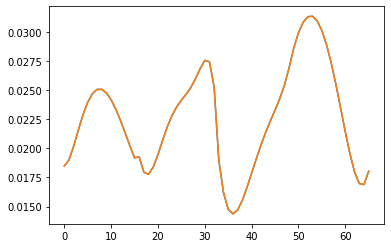

In [0]:
print(H.shape)
H1 = np.swapaxes(H,0,2)
x = np.linspace(0,65,66)
y = H[:,7,8678]
y1 = H1[8678, 7, :]
plt.plot(x,y)
plt.plot(x,y1)
print(H1.shape)

In [0]:
Y_pos = load_unlabelled('/content/drive/My Drive/CTW_2019/r_Position_CTW_Train.h5')

<KeysViewHDF5 ['r_Position']>


In [0]:
print(Y_pos.shape)
Y = np.swapaxes(Y_pos, 0,1)
print(Y.shape)

(3, 17486)
(17486, 3)


In [0]:
print(H.shape)
H_Re = H[0,:,:,:]
H_Im = H[1,:,:,:]

data2 = np.sqrt(H_Re**2 + H_Im**2)
data2 = data2.reshape(17486,16,924)
print(data2.shape)
del H_Re, H_Im

(2, 924, 16, 17486)
(17486, 16, 924)


In [0]:
print(tH_Re.shape)
del tSNR
#del tH_Re, tH_Im, tSNR

(36192, 56, 924)


In [0]:
#CTW_labelled = "/content/drive/My Drive/CTW2020/CTW2020_Unlabelled/"
#import os
#print(os.listdir("/content/drive/My Drive/CTW2020/Processed Data"))
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
#%%
x = np.linspace(1,924,924,dtype=fworksloat)

y = []

for i in range(924):
  y.append(data[9,1,i])

#data_file = CTW_labelled+"file_"+str(1)+".hdf5"
#H_Re, H_Im, SNR = get_data2(data_file)

#print(H_Re[1,1,1,:])

#idx = find(tSNR)
#del tSNR
#tH_Re = preprocess(tH_Re, idx)r
#tH_Im = preprocess(tH_Im, idx)
#SNR = preprocess2(SNR, idx)
#print(SNR.shape)
#del idx

NameError: ignored

In [0]:
'''

for i in range(2,15):
    temp = CTW_labelled + "file_"+str(i)+".hdf5"
    tH_Re, tH_Im, tSNR = get_data2(temp)
    idx = find(tSNR)
    tH_Re = preprocess(tH_Re, idx)
    tH_Im = preprocess(tH_Im, idx)
    tSNR = preprocess2(tSNR, idx)
    H_Re, H_Im, SNR  = np.concatenate((H_Re, tH_Re)), np.concatenate((H_Im, tH_Im)), np.concatenate((SNR, tSNR))

del tH_Re,tH_Im,tSNR'''x


In [0]:
#from sklearn.preprocessing import MinMaxScaler
samples = tH_Re.shape[0]
#H_Re = tH_Re.reshape((samples,-1))
#print(tH_Re.shape)
#H_Im = tH_Im.reshape((samples,-1))
#SNR = SNR.reshape((samples,-1))
#Pos = Pos.reshape((samples,-1))

#data = np.sqrt(H_Re**2 + H_Im**2)
data2 = np.sqrt(tH_Re**2 + tH_Im**2)
del tH_Re , tH_Im
print(data2.shape)

(36192, 56, 924)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
#%%
dim1 = int(data2.shape[0]/2)
#dim1 = 10
dim2 = data2.shape[1]
new_dim = 66
data3 = np.zeros((dim1,dim2, new_dim))

#Polynomial fitting code
t1 = time.time()
R2s = []
w = np.linspace(0,1,22)
for u in range(dim1):
    for v in range(dim2):
        
        degrees = [4,5,6,7,8]
        
        batches = [0,242,220,473,451,704,682,924]  #len = 8
        final_x = np.linspace(1,924,924)
        final_y = np.zeros((924,))
        prev = np.zeros([22,])
        for i in range(4):
            x = np.linspace(batches[i*2],batches[2*i + 1],-batches[i*2]+batches[2*i + 1])
           # print()
            #print(x.shape)
            y = []
        
            for j in range(batches[i*2],batches[2*i+1]):
                y.append(data2[u + dim1,v,j])
             
            y = np.array(y)
            x = x[:, np.newaxis]
            y = y[:, np.newaxis]
            r2 = np.Infinity
            best_deg = 0
            for deg in degrees:
                polynomial_features= PolynomialFeatures(degree=deg, interaction_only=False)
                x_poly = polynomial_features.fit_transform(x)
                model = LinearRegression()
                model.fit(x_poly, y)
                y_poly_pred = model.predict(x_poly)
                
                rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
                #temp = r2_score(y,y_poly_pred)
                if rmse < r2:
                    best_deg = deg
                    r2 = rmse
                    final_y[batches[i*2]:batches[2*i+1]] = y_poly_pred.reshape((-1))
                    #print(str(r2) + " Testing ")
                    
            #print("Best found " + str(r2))
            R2s.append(rmse)
            
            tmp1 = final_y[batches[i*2]:batches[i*2]+22]
            if prev.all() != 0:
                final_y[batches[i*2]:batches[i*2]+22] = tmp1*w + prev*(1-w)
            prev = final_y[batches[i*2 + 1]-22:batches[i*2 + 1]]
            
        data3[u,v,:] = [final_y[i] for i in range(0,len(final_y), 14)]    
    t2 = time.time() 
    print(str(u) + "th of " + str(dim1))
    print("Time elasped: " + str((t2-t1)/60) + " mins.")    
    t2 = time.time() 
   # print(str(u) + "th of " + str(dim1))
   # print("Time elasped: " + str((t2-t1)/60) + " mins.")
#%%
t3 = time.time()
print("DONE")
print("Total time: " + str((t3-t1)/3600) + " hrs.")
#plt.plot(final_x, final_y)

#x1 = np.linspace(1,924,924,dtype=float)

#y1 = []
'''
for i in range(924):
  y1.append(data[9,1,i])

y1 = np.array(y1)

plt.scatter(x1,y1,s=12)

'''

In [0]:
#Testing if above works or not

x1 = np.linspace(1,924,924,dtype=float)
x2 = np.linspace(1,924,66,dtype=float)
# y1 =

# for i in range(924):
#   y1.append(data[9,1,i])

# y1 = np.array(y1)

# plt.scatter(x1,y1,s=12)
y1 = data3[41,1,:]
#asd
plt.plot(x2,y1,'r')
plt.scatter(x1, data2[41,1,:],s=12)



In [0]:
hf = h5py.File('/content/drive/My Drive/CTW_2019/data_feat2.h5', 'w')
hf.create_dataset('dataset_1', data=data3)
hf.close()

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca_50 = PCA(n_components=100)
y = pca_50.fit_transform(data)
s
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9999203382894867


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adadelta, Adam, RMSprop

def create_model(input_dim):
    inp = Input(shape=(input_dim))
    x = Dense(1024, activation='relu')(inp)
    #layer3 = Dense(512, activation='relu')(layer2)
    x = Dense(1024, activation='relu')(x)
    encoded = Dense(512, activation='relu')(x)
    x =  Dense(1025, activation='relu')(encoded)
    #layer6 = Dense(512, activation='relu')(layer5)
    x = Dense(1024, activation='relu')(x)
    
    decoded = Dense(input_dim, activation='relu')(x)
    
    
    return Model(inp, encoded), Model(inp, decoded)


def data_gen(data):
    for i in range(len(data)):
        yield (data[i:i+1],data[i:i+1])

def data_gen2(data, target):
    for i in range(len(data)):
        yield (data[i:i+1],target[i:i+1])
    

In [0]:
print(H.shape)
print(Y_pos.shape)



print(data19.shape)

(66, 16, 17486)
(3, 17486)
(17486, 16, 66, 1)


In [0]:
data19 = np.concatenate((H1, Y_pos[:,:,None]), axis=0)

print(data19.shape)

ValueError: ignored

In [0]:
def mlp():
  inp = Input(shape=(16,66))
  x = Flatten()(inp)
  x = Dense(1024,activation = 'relu')(x)
  #x = Dense(1024, activation = 'relu')(x)
  x = Dropout(0.03)(x)
  x = Dense(512, activation = 'relu',kernel_initializer='glorot_uniform',
                bias_initializer='zeros')(x)
  x = Dropout(0.03)(x)
  x = Dense(256, activation = 'relu',kernel_initializer='glorot_uniform',
                bias_initializer='zeros')(x)
  x = Dropout(0.03)(x)
  x = Dense(128, activation = 'relu',kernel_initializer='glorot_uniform',
                bias_initializer='zeros')(x)
  x = Dropout(0.03)(x)
  x = Dense(32, activation = 'relu',kernel_initializer='glorot_uniform',
                bias_initializer='ones')(x)
  x = Dropout(0.03)(x)
  x = Dense(12, activation = 'relu',kernel_initializer='glorot_uniform',
                bias_initializer='ones')(x)
  x = Dropout(0.03)(x)
  op = Dense(3, activation = 'relu',kernel_initializer='glorot_uniform',
                bias_initializer='ones')(x)
  return Model(inp, op)



In [0]:
from sklearn.model_selection import train_test_split
traindata,valdata  = train_test_split(H1, test_size=0.1, random_state=54) 
trainy,valy  = train_test_split(Y, test_size=0.1, random_state=54) 
print(traindata.shape)
steps = len(traindata)
print(steps)
val_Steps = len(valdata)
print(val_Steps)

(15737, 16, 66)
15737
1749


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(H1, test_size=0.1, random_state=42, shuffle=True)
y_train,y_test = train_test_split(Y, test_size=0.1, random_state=42, shuffle=True)
#print(H_new.shape,pos.shape)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(15737, 16, 66) (1749, 16, 66)
(15737, 3) (1749, 3)


In [0]:
mlp_2019 = mlp()
from sklearn.model_selection import KFold
opt = RMSprop(learning_rate=0.001, decay=1e-6)
mlp_2019.compile(optimizer=opt,loss = 'mean_squared_error')
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
checkpointer = ModelCheckpoint('/content/drive/My Drive/CTW_2019/CTW2019_mean_sqr2.h5', verbose=1, save_best_only=True)
mlp_2019.fit(X_train, y_train, epochs = 150, verbose=1, batch_size = 20, validation_split=0.1, callbacks = [checkpointer, early_stopping])

error = []

kfold = KFold(10, True, 1)
# enumerate splits
'''
for train, test in kfold.split(H1):
  trainy, testy = Y[train], Y[test]
  traindata, testdata = H1[train], H1[test]
  mlp_2019  = mlp()
  mlp_2019.compile(optimizer=Adam(lr=0.0005),loss = 'mean_squared_error', metrics = ['accuracy'])
  mlp_2019.fit(traindata, trainy, epochs = 200, batch_size = 20, verbose=1, validation_split=0.1, callbacks = [checkpointer])
  error.append(mlp_2019.evaluate(testdata, testy))


#mlp_2019.fit_generator(kfoldcv(H1,Y)[0],validation_data = kfoldcv(H1,Y)[1], epochs = 150, steps_per_epoch = len(kfoldcv(H1,Y)[0][0]) ,
#                        validation_steps = len(kfoldcv(H1,Y)[1][0]), callbacks=[checkpointer])

'''


Train on 14163 samples, validate on 1574 samples
Epoch 1/150
14163/14163 [==============================] - 4s 282us/step - loss: 0.5747 - val_loss: 0.6830

Epoch 00001: val_loss improved from inf to 0.68302, saving model to /content/drive/My Drive/CTW_2019/CTW2019_mean_sqr2.h5
Epoch 2/150
14163/14163 [==============================] - 4s 258us/step - loss: 0.4406 - val_loss: 0.3704

Epoch 00002: val_loss improved from 0.68302 to 0.37037, saving model to /content/drive/My Drive/CTW_2019/CTW2019_mean_sqr2.h5
Epoch 3/150
14163/14163 [==============================] - 4s 260us/step - loss: 0.3919 - val_loss: 0.5839

Epoch 00003: val_loss did not improve from 0.37037
Epoch 4/150
14163/14163 [==============================] - 4s 265us/step - loss: 0.3625 - val_loss: 0.3409

Epoch 00004: val_loss improved from 0.37037 to 0.34093, saving model to /content/drive/My Drive/CTW_2019/CTW2019_mean_sqr2.h5
Epoch 5/150
14163/14163 [==============================] - 4s 260us/step - loss: 0.3401 - val_

"\nfor train, test in kfold.split(H1):\n  trainy, testy = Y[train], Y[test]\n  traindata, testdata = H1[train], H1[test]\n  mlp_2019  = mlp()\n  mlp_2019.compile(optimizer=Adam(lr=0.0005),loss = 'mean_squared_error', metrics = ['accuracy'])\n  mlp_2019.fit(traindata, trainy, epochs = 200, batch_size = 20, verbose=1, validation_split=0.1, callbacks = [checkpointer])\n  error.append(mlp_2019.evaluate(testdata, testy))\n\n\n#mlp_2019.fit_generator(kfoldcv(H1,Y)[0],validation_data = kfoldcv(H1,Y)[1], epochs = 150, steps_per_epoch = len(kfoldcv(H1,Y)[0][0]) ,\n#                        validation_steps = len(kfoldcv(H1,Y)[1][0]), callbacks=[checkpointer])\n\n"

In [0]:
def rmse(p1, p2):
  return np.sqrt(np.sum((p1-p2)**2, axis = 1))


In [0]:
m2  = load_model("/content/drive/My Drive/CTW_2019/CTW2019_mean_sqr2.h5")
l = 140
r = 150
pred = m2.predict(X_test)
org = y_test
print(pred[:,:-1].shape)
print(org[:,:-1].shape)
print(np.mean(rmse(pred, org)))
print(np.mean(rmse(pred[:,:-1], org[:,:-1])))

(1749, 2)
(1749, 2)
0.6284134370585278
0.274711075025098


In [0]:
error = np.array(error)
np.savetxt('/content/drive/My Drive/CTW_2019/test.out', x, delimiter=',')

In [0]:
for i in range(Y.shape[0]):
  if abs(Y[i,2]) > 1:
    print(i) 
  else:
    print(0)

In [0]:
def conv_ae(input_dim):
  #Edit this
  inp = Input(shape=(input_dim)) #56x77
  x = Conv2D(4,(3,3),strides=(1,1),padding='same',,activation='relu')(inp)
  x = MaxPooling2D((2, 2), padding='same')(x)    #28x39x4
  x = Conv2D(8,(3,3),strides=(1,1),padding='same',activation='relu')(x)
  x = MaxPooling2D((2, 2), padding='same')(x) #14x20x8
  x = Conv2D(16,(3,2),strides=(1,1),padding='same',activation='relu')(x)
  encoded = MaxPooling2D((3, 3), padding='same')(x) #5x7x16
  x = Conv2D(16,(3,2),strides=(1,1),padding='same',activation='relu')(encoded)
  x = UpSampling2D((3, 3))(x)
  x = Conv2D(8,(3,3),strides=(1,1),padding='same',activation='relu')(x)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(4,(3,3),strides=(1,1),padding='same', activation='relu')(inp)
  x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
  return Model(inp, decoded), Model(inp, encoded)

In [0]:
def conv_classifier(input_dim);
  inp = Input(shape=(input_dim))
  op = Dense(3,activation='sigmoid')(x)
  return Model(inp, op)

In [0]:
from sklearn.model_selection import train_test_split
y,y_v  = train_test_split(y, test_size=0.3, random_state=54) 
print(y.shape)
steps = len(y)
print(steps)
val_Steps = len(y_v)
print(val_Steps)

(5398, 5000)
5398
2314


In [0]:
encoder, autoencoder = create_model(inp_dim)
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystopper = EarlyStopping(patience = 10, verbose=1)
checkpointer = ModelCheckpoint('Best.h5', verbose=1, save_best_only=True)
for i in range(200):
    autoencoder.fit_generator(data_gen(y),validation_data = data_gen(y_v), epochs = 1, steps_per_epoch = steps ,
                        validation_steps = len(y_v), callbacks=[earlystopper, checkpointer])
model.save('mymodel2.h5')

In [0]:
#CLassifier

def cls(inp):
  inp = Input(shape=(inp,))
  x = Dense(512, activation='relu')(inp)
  x = Dropout(0.4)(x)
  x = Dense(512, activation='softmax')(x)
  return Model(inp, x)


